<a href="https://colab.research.google.com/github/Nashwath1901/SRM/blob/main/Predicting%20Customer%20Purchase%20Patterns%20and%20Salary%20Insights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   Age  EstimatedSalary  Purchased
0   56            35287          0
1   46            64387          1
2   32            38512          0
3   60            31342          0
4   25            93076          1
Classification Accuracy: 0.79
F1 Score: 0.84
Confusion Matrix:
[[ 51  22]
 [ 20 107]]
Regression RMSE: 76.81


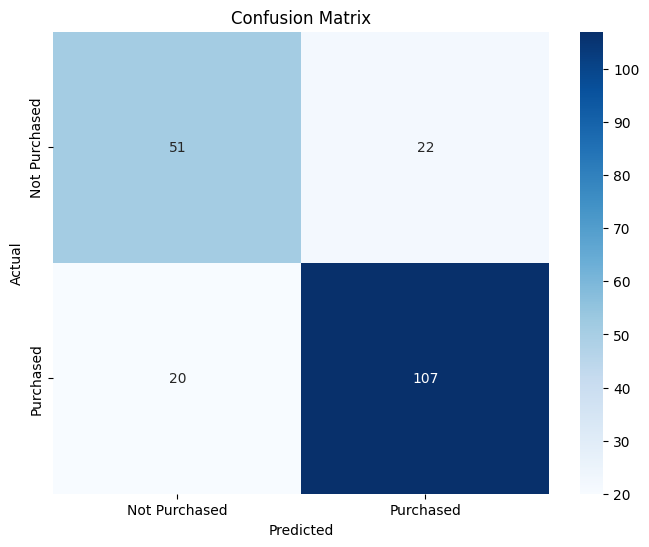

Submission file generated successfully as 'submission_classification.csv'.


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Generate Synthetic Data
np.random.seed(42)

n_samples = 1000
age = np.random.randint(18, 65, size=n_samples)
estimated_salary = np.random.randint(30000, 120000, size=n_samples)

purchased = (age * 0.5 + estimated_salary * 0.0005 + np.random.normal(0, 10, n_samples)) > 50
purchased = purchased.astype(int)

data = pd.DataFrame({
    'Age': age,
    'EstimatedSalary': estimated_salary,
    'Purchased': purchased
})

# Display the first few rows of the dataset
print(data.head())

# Step 2: Split the Data into Features and Target Variables
X = data[['Age', 'EstimatedSalary']]
y_classification = data['Purchased']
y_regression = data['EstimatedSalary']

X_train_class, X_val_class, y_train_class, y_val_class = train_test_split(X, y_classification, test_size=0.2, random_state=42)
X_train_reg, X_val_reg, y_train_reg, y_val_reg = train_test_split(X, y_regression, test_size=0.2, random_state=42)

# Step 3: Build and Evaluate a Classification Model
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train_class, y_train_class)

y_pred_class = classifier.predict(X_val_class)

accuracy = accuracy_score(y_val_class, y_pred_class)
f1 = f1_score(y_val_class, y_pred_class)
conf_matrix = confusion_matrix(y_val_class, y_pred_class)

print(f'Classification Accuracy: {accuracy:.2f}')
print(f'F1 Score: {f1:.2f}')
print('Confusion Matrix:')
print(conf_matrix)

# Step 4: Build and Evaluate a Regression Model
regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(X_train_reg, y_train_reg)

y_pred_reg = regressor.predict(X_val_reg)

rmse = np.sqrt(mean_squared_error(y_val_reg, y_pred_reg))
print(f'Regression RMSE: {rmse:.2f}')

# Optional: Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Purchased', 'Purchased'], yticklabels=['Not Purchased', 'Purchased'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Step 5: Generate Submission File for Classification
# Create a new DataFrame for submission
submission_data = pd.DataFrame({
    'Age': X_val_class['Age'],
    'EstimatedSalary': X_val_class['EstimatedSalary'],
    'Purchased': y_pred_class
})

# Save the submission DataFrame to a CSV file
submission_data.to_csv('submission_classification.csv', index=False)
print("Submission file generated successfully as 'submission_classification.csv'.")